In [1]:
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

import matplotlib.cm as cm

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
from pandas.core import datetools

from sklearn import metrics

from sklearn.model_selection import train_test_split

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
location = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\handsets.csv"

In [3]:
# load the training data from glass data set
df = pd.read_csv(location)

In [4]:
df.shape

(15, 4)

In [5]:
df.head()

,sl_no,price,adv,sales
0,1,150,100,0.73
1,2,159,200,1.39
2,3,170,350,2.03
3,4,175,400,1.45
4,5,179,500,1.82


#### using statsmodel

In [6]:
# formula based statsmodel
model = smf.ols(formula='sales ~ price + adv', data=df)

In [7]:
results = model.fit()

In [8]:
results.params

Intercept    1.818405
price       -0.006310
adv          0.002400
dtype: float64

In [9]:
# sm model
X = df[['price', 'adv']]
X = sm.add_constant(X)

y = df['sales']

olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     6.756
Date:                Fri, 08 Mar 2019   Prob (F-statistic):             0.0108
Time:                        16:07:55   Log-Likelihood:                -4.7510
No. Observations:                  15   AIC:                             15.50
Df Residuals:                      12   BIC:                             17.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8184      0.620      2.931      0.0

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [10]:
df.head()

,sl_no,price,adv,sales
0,1,150,100,0.73
1,2,159,200,1.39
2,3,170,350,2.03
3,4,175,400,1.45
4,5,179,500,1.82


In [57]:
print('column 1 min and max value : ', df.iloc[:, 1].min(), df.iloc[:, 1].max())
print('column 2 min and max value : ', df.iloc[:, 2].min(), df.iloc[:, 2].max())

column 1 min and max value :  150 249
column 2 min and max value :  100 500


In [58]:
# Fix four corners of grid boundaries: Corners are
# as per min and max values of each of the two Iris attributes
x1_min, x1_max = df.iloc[:, 1].min() - 1, df.iloc[:, 1].max() + 1
x2_min, x2_max = df.iloc[:, 2].min() - 1, df.iloc[:, 2].max() + 1

print('column 1 min and max value : ', x1_min, x1_max)
print('column 2 min and max value : ', x2_min, x2_max)

column 1 min and max value :  149 250
column 2 min and max value :  99 501


In [59]:
# Create a mesh with 
# bottom-left corner: (x_min, y_min) & 
# top-right corner:   (x_max,y_max). 

# cell width & height: h. (Larger h leads to coarser class-boundaries)
# 'meshgrid' is very useful to evaluate functions on a grid.
h = .1 

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

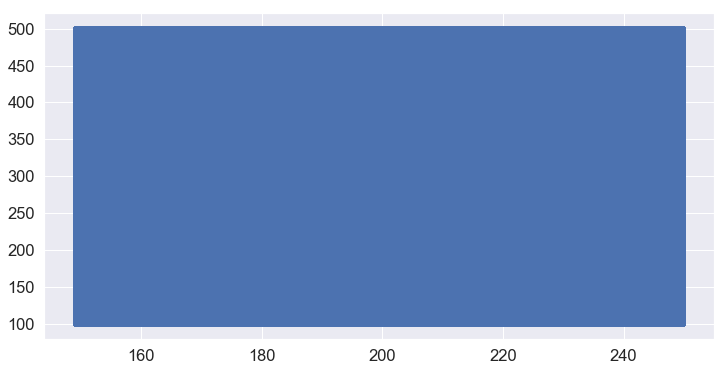

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(xx1, xx2, 'b.');

In [61]:
# all the Xs
X_test = pd.DataFrame({'price': xx1.ravel(), 'adv': xx2.ravel()})

In [70]:
X_test.shape

(4060200, 2)

In [71]:
# get the fitted line (predictions)
y_pred = results.predict(exog=X_test)

#y_pred_ols = olsres.predict(exog=X_test.values)

use actual values of Y to draw a scatter plot of data points and predicted values of Y to draw the learned model plane.

#### using the scikit learn regession

In [72]:
linreg = LinearRegression()

X = df[['price', 'adv']]
y = df['sales']

In [73]:
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
linreg.intercept_

1.8184047919084696

In [75]:
linreg.coef_

array([-0.00630965,  0.00240009])

In [76]:
y_pred_lin = linreg.predict(X_test)

In [77]:
X_test

,adv,price
0,99.0,149.0
1,99.0,149.1
2,99.0,149.2
3,99.0,149.3
4,99.0,149.4
5,99.0,149.5
6,99.0,149.6
7,99.0,149.7
8,99.0,149.8
9,99.0,149.9


#### plot both side by side

Text(0.5,0,'Sales')

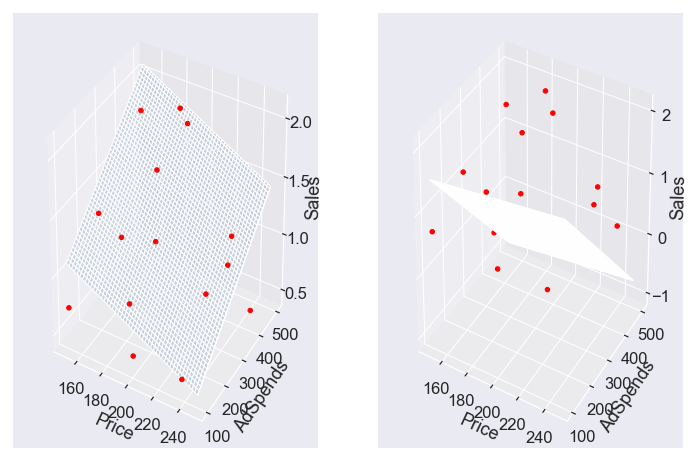

In [79]:
fig = plt.figure(figsize=(12, 8))

ax1  = fig.add_subplot(121, projection='3d')

ax1.scatter(df['price'],
           df['adv'],
           df['sales'],
           c='red', 
           marker='o', 
           alpha=1)

ax1.plot_surface(xx1, 
                 xx2,
                 y_pred.values.reshape(xx1.shape), 
                 color='b', 
                 alpha=0.2)

# Set rotation angle to 30 degrees
#ax1.view_init(azim=30)

ax1.set_xlabel('Price')
ax1.set_ylabel('AdSpends')
ax1.set_zlabel('Sales')

##################################################################

ax2  = fig.add_subplot(122, projection='3d')
ax2.scatter(df['price'],
           df['adv'],
           df['sales'],
           c='red', 
           marker='o', 
           alpha=1)
ax2.plot_surface(xx1, 
                 xx2,
                 y_pred_lin.reshape(xx1.shape),
                 color='b', 
                 alpha=0.2)

# Set rotation angle to 30 degrees
#ax2.view_init(azim=30)

ax2.set_xlabel('Price')
ax2.set_ylabel('AdSpends')
ax2.set_zlabel('Sales')